In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np

ltl = 'F G a'
# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
# display(oa)


# MDP Description
shape = (5,4)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'T'],
    ['B',  'E',  'E',  'E'],
    ['E',  'E',  'B',  'E'],
    ['B',  'T',  'E',  'E']
])

label = np.array([
    [(),       ('a',),     (),    ()],
    [(),       (),     (),    ()],
    [(),       (),     (),    ()],
    [('a',),   (),     (),    ()],
    [(),       (),     (),    ()]
],dtype=np.object)

reward = np.zeros(shape)

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,robust=True)  # Use figsize=4 for smaller figures
# grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

Number of Omega-automaton states (including the trap state): 2


In [2]:
# oa.__dict__

In [3]:
# Q=csrl.minimax_q(T=2**5,K=2**10)
# value = np.max(np.min(Q,axis=-1),axis=-1)
# policy, policy_ = csrl.get_greedy_policies(value)
# csrl.plot(value=value,policy=policy,policy_=policy_)

Number of Omega-automaton states (including the trap state): 3


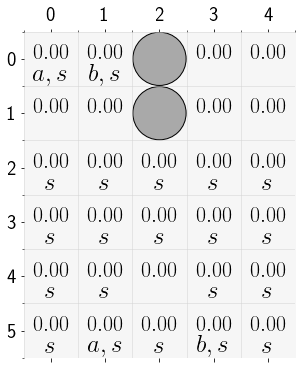

In [4]:
# Specification
ltl = 'F G s & G F a & G F b'
oa = OmegaAutomaton(ltl,oa_type='dra')
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (6,5)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
    ['E',  'E',  'B',  'E',  'E'],
    ['E',  'E',  'B',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E'],
    ['E',  'E',  'E',  'E',  'E']
])

label = np.array([
    [('a','s'), ('b','s'), (),     (),        ()],
    [(),        (),        (),     (),        ()],
    [('s',),    ('s',),    ('s',), ('s',),    ('s',)],
    [('s',),    ('s',),    ('s',), ('s',),    ('s',)],
    [('s',),    ('s',),    (),     ('s',),    ('s',)],
    [('s',),    ('a','s'), ('s',), ('b','s'), ('s',)]
],dtype=np.object)

reward = np.zeros(shape)

grid_mdp = GridMDP(shape=shape,structure=structure,reward=reward,label=label,figsize=6,robust=True)  # Use figsize=4 for smaller figures
grid_mdp.plot()
# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa)

In [5]:
oa.__dict__

{'oa_type': 'dra',
 'q0': 0,
 'delta': [{(): 0,
   ('a',): 0,
   ('b',): 0,
   ('s',): 0,
   ('a', 'b'): 0,
   ('a', 's'): 1,
   ('b', 's'): 0,
   ('a', 'b', 's'): 1},
  {(): 0,
   ('a',): 0,
   ('b',): 0,
   ('s',): 1,
   ('a', 'b'): 0,
   ('a', 's'): 1,
   ('b', 's'): 0,
   ('a', 'b', 's'): 0},
  {(): 2,
   ('a',): 2,
   ('b',): 2,
   ('s',): 2,
   ('a', 'b'): 2,
   ('a', 's'): 2,
   ('b', 's'): 2,
   ('a', 'b', 's'): 2}],
 'acc': [{(): [False],
   ('a',): [False],
   ('b',): [False],
   ('s',): [None],
   ('a', 'b'): [False],
   ('a', 's'): [None],
   ('b', 's'): [None],
   ('a', 'b', 's'): [True]},
  {(): [False],
   ('a',): [False],
   ('b',): [False],
   ('s',): [None],
   ('a', 'b'): [False],
   ('a', 's'): [None],
   ('b', 's'): [True],
   ('a', 'b', 's'): [True]},
  {(): [None],
   ('a',): [None],
   ('b',): [None],
   ('s',): [None],
   ('a', 'b'): [None],
   ('a', 's'): [None],
   ('b', 's'): [None],
   ('a', 'b', 's'): [None]}],
 'shape': (1, 3),
 'spot_oa': None,
 'eps': [

In [6]:
# Q=csrl.minimax_q(T=2**7,K=2**12)
Q = np.load('Q.npy')
value = np.max(np.min(Q,axis=-1),axis=-1)
csrl.plot(value)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …

In [7]:
policy = np.argmax(np.min(Q,axis=-1),axis=-1)
policy_ = np.take_along_axis(np.argmin(Q,axis=-1),np.expand_dims(policy,axis=-1),axis=-1).reshape(policy.shape)
csrl.plot(policy=policy,policy_=policy_)

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=2), …